In [1]:
import re                                     # regular expressions
import string                                 # string operations
import os                                     # access directories
import pandas as pd                           # dataframes
import numpy as np                            # mathematical functions
from tqdm import tqdm                         # create progress bar (for i in tqdm(list))
tqdm.pandas()                                 # use progress_apply() instead of apply() for progress bar on pandas operations
from nltk.stem import WordNetLemmatizer       # Natural Language Toolkit
lemmatizer = WordNetLemmatizer()              # lemmatizer
from corpus_toolkit import corpus_tools as ct # keyness analysis
from wordcloud import WordCloud               # wordcloud plots
import matplotlib as mpl                      # plots
import matplotlib.pyplot as plt               # plots
from IPython.display import Markdown as md    # improved markdown capabilities

os.chdir('../Data')                           # set the working directory

In [2]:
# Load data
df = pd.read_json("UoE_staff_publications_theses_spaczz_matches.json")

In [3]:
df['year'] = df.dates.str[0:4].apply(lambda y: pd.to_numeric(y) if not y==None else y).astype('Int64')

In [4]:
# Functions 
def getFrequencyDictForText(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

    
def makeWordcloudLarge(frequencydict, maxwords = 100, seed = 12, relative_scale_factor = 'auto'):
    wc = WordCloud(background_color="white",
                   width=1800, height=1200, 
                   max_words=maxwords, random_state=seed,
                   relative_scaling=relative_scale_factor)
    wc.generate_from_frequencies(frequencydict)
    plt.figure(figsize=(16.5354, 11.69))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
def makeWordcloud(frequencydict, maxwords = 100, seed = 12, relative_scale_factor = 'auto'):
    wc = WordCloud(background_color="white",
                   width=1000, height=1000, 
                   max_words=maxwords, random_state=seed,
                   relative_scaling=relative_scale_factor)
    wc.generate_from_frequencies(frequencydict)
    plt.figure(figsize=(9.352,9.352))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
cmap = mpl.cm.plasma(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[8:,:-1])

def makeWordcloudDark(frequencydict, maxwords = 100, seed = 12, relative_scale_factor = 'auto'):
    wc = WordCloud(background_color="#00205B",
                   colormap = cmap,
                   width=1000, height=1000, 
                   max_words=maxwords, random_state=seed,
                   relative_scaling=relative_scale_factor)
    wc.generate_from_frequencies(frequencydict)
    plt.figure(figsize=(9.352,9.352))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

In [5]:
# Clean up the data

# Replace empty lists with None
df.methods = df.methods.apply(lambda y: None if not y==None and y==[] else y)
# Lemmatise the methods 
df.methods = df.methods.apply(lambda y: [lemmatizer.lemmatize(method.lower()) for method in y] if not y==None else y)
# Standardise different versions of the same method (family)
df.methods = df.methods.apply(lambda y: [method.replace("’", "'") for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['ANOVA' if method in ['analysis of variance', 'anova', 'one-way analysis of variance', 'two-way analysis of variance'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['ANCOVA' if method in ['analysis of covariance', 'ancova'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['ARIMA' if method in ['arima'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['anonymization' if method in ['anonymity'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['archival research' if method in ['archival analysis'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['bayesian methods' if method in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['case study research' if method in ['case study'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['categorical variables' if method in ['categorical variable', 'ordinal scale', 'ordinal scales'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['census data' if method in ['census'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['confidence intervals' if method in ['confidence interval'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['continuous variables' if method in ['continuous variable', 'ratio scale'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['dependent variables' if method in ['dependent variable'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['independent variables' if method in ['independent variable'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['internal validity' if method in ['validity, internal'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['randomized control trials' if method in ['randomized clinical trials'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['standard deviations' if method in ['standard deviation'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['semi-structured interviews' if method in ['semi-structured interview'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['generalized linear models' if 'general ' in method or 'generalized' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['interviews' if 'interview' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['imputation' if 'imputation' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['longitudinal analysis' if 'longitudinal' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['neural networks' if 'neural network' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['multilevel analysis' if 'multilevel' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['regression analysis' if 'regression ' in method or ' regression' in method else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['sampling' if 'sampl' in method else method for method in y] if not y==None else y)
# Summarise measures of central tendency and spread
df.methods = df.methods.apply(lambda y: ['measures of central tendency' if method in ['mean', 'median', 'mode'] else method for method in y] if not y==None else y)
df.methods = df.methods.apply(lambda y: ['measures of spread' if method in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else method for method in y] if not y==None else y)

# Research methods in the University of Exeter

In [6]:
md(f'''To get an overview of the many *research methods* used at the University of Exeter, 
all available abstracts of publications uploaded to the [Open Research Exeter](https://ore.exeter.ac.uk/repository/)
Database have been downloaded and matched with research methods dictionaries. 
This resulted in a dataset of {len(df.dropna(subset=['abstracts']))} abstracts by University of Exeter researchers,
{len(df.dropna(subset=['abstracts', 'methods']))} of which mentioning at least one research method and spanning a
{df.dropna(subset=['abstracts', 'methods']).year.max() - df.dropna(subset=['abstracts', 'methods']).year.min()} year time period
from {df.dropna(subset=['abstracts', 'methods']).year.min()} to {df.dropna(subset=['abstracts', 'methods']).year.max()}.''')


To get an overview of the many *research methods* used at the University of Exeter, 
all available abstracts of publications uploaded to the [Open Research Exeter](https://ore.exeter.ac.uk/repository/)
Database have been downloaded and matched with research methods dictionaries. 
This resulted in a dataset of 28203 abstracts by University of Exeter researchers,
21813 of which mentioning at least one research method and spanning a
37 year time period
from 1985 to 2022.

## Overview

In [7]:
md(f'''A total of {len(set([item for sublist in [list(set(m)) for m in df['methods'] if not m == None] for item in sublist]))} different research methods
were found in the entirety of abstracts. <br> Let's start by having a look at the 150 most commonly mentioned research methods of all time.''')

A total of 397 different research methods
were found in the entirety of abstracts. <br> Let's start by having a look at the 150 most commonly mentioned research methods of all time.

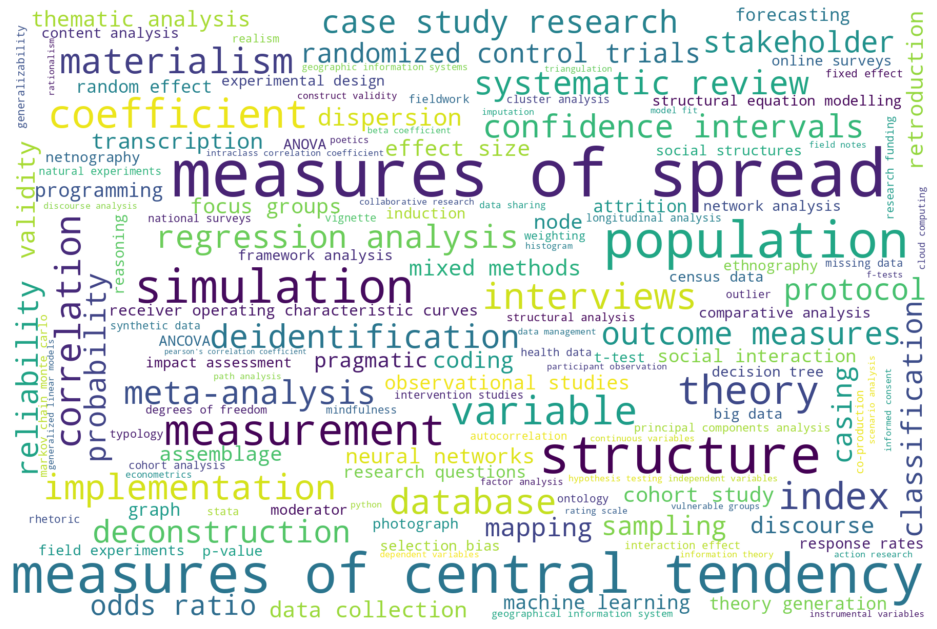

In [8]:
# Wordcloud of the 150 most common research methods at the University of Exeter
corpMethods = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloudLarge(corpMethods, seed = 1, maxwords = 150, relative_scale_factor = 0.35)
plt.show()
# plt.savefig('../Plots/UoE_wordcloud.jpg', bbox_inches='tight', dpi=600)
plt.close()

## Research methods by department - a closer look

In [9]:
md('''Let's narrow the analysis down by investigating each department seperately. <br> To do so we will look at two different measures for each department: the **top 50 research methods in absolute numbers** (most often mentioned) and the **top 20 research methods in relative importance**
(*keyness*, i.e. the significance of the method's frequency within the department relative to the entire university indicating the most specialised methods within the department). ''')

Let's narrow the analysis down by investigating each department seperately. <br> To do so we will look at two different measures for each department: the **top 50 research methods in absolute numbers** (most often mentioned) and the **top 20 research methods in relative importance**
(*keyness*, i.e. the significance of the method's frequency within the department relative to the entire university indicating the most specialised methods within the department). 

### Business School

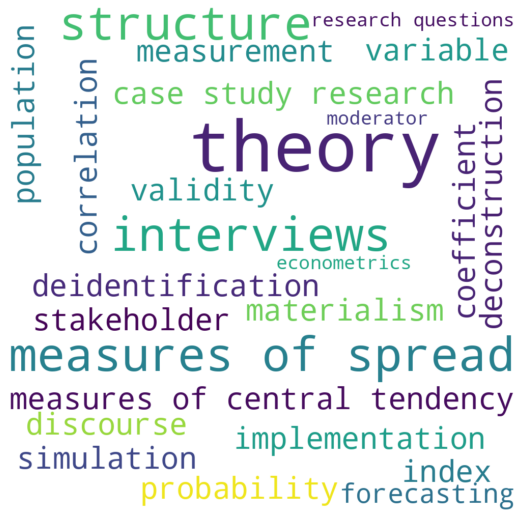

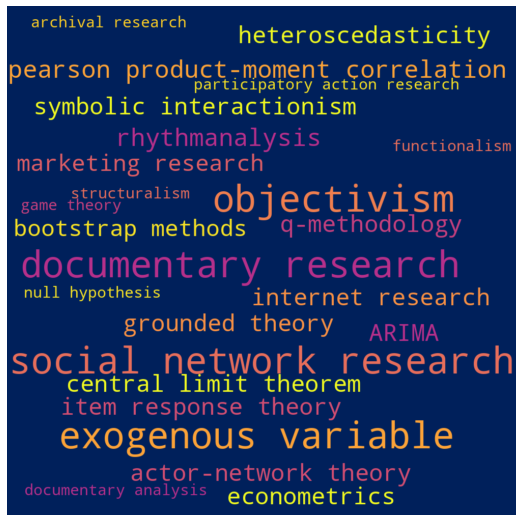

In [10]:
# Business school
corpBusiness = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.college == 'Business School']['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloud(corpBusiness, seed = 1, maxwords = 25, relative_scale_factor = 0.01)
plt.show()
# plt.savefig('../Plots/Business_topmethods.jpg', bbox_inches='tight', dpi=400)
plt.close()

# Keyness
keynessBusiness = ct.keyness(corpBusiness.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudDark(keynessBusiness, seed = 1, maxwords = 25, relative_scale_factor = 0.1)
plt.show()
# plt.savefig('../Plots/Business_keymethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

### College of Engineering, Mathematics and Physical Sciences

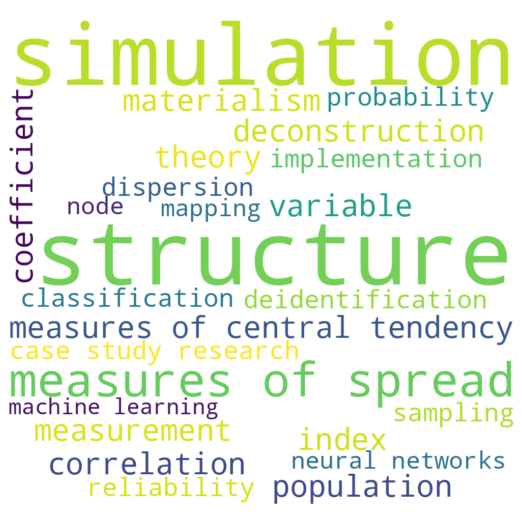

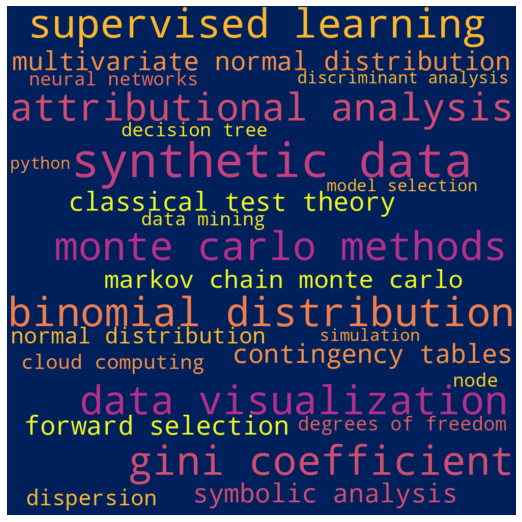

In [11]:
# CEMPS
corpCEMPS = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.college == 'College of Engineering, Mathematics and Physical Sciences']['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloud(corpCEMPS, seed = 1, maxwords = 25, relative_scale_factor = 0.01)
plt.show()
# plt.savefig('../Plots/CEMPS_topmethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

# Keyness
keynessCEMPS = ct.keyness(corpCEMPS.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudDark(keynessCEMPS, seed = 1, maxwords = 25, relative_scale_factor = 0.999)
plt.show()
# plt.savefig('../Plots/CEMPS_keymethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

### College of Humanities

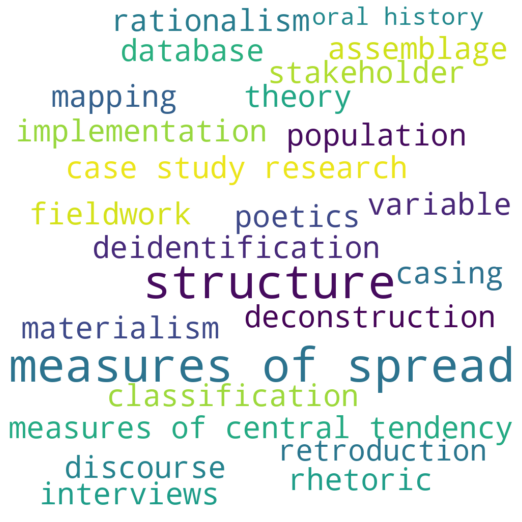

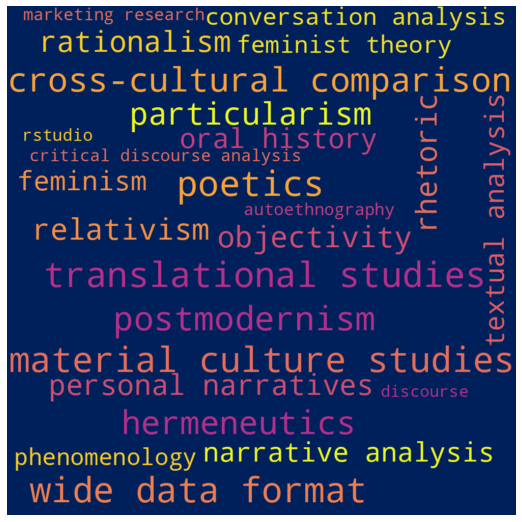

In [12]:
# College of Humanities
corpHumanities = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.college == 'College of Humanities']['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloud(corpHumanities, seed = 1, maxwords = 25, relative_scale_factor = 0.01)
plt.show()
# plt.savefig('../Plots/Humanities_topmethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

# Keyness
keynessHumanities = ct.keyness(corpHumanities.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudDark(keynessHumanities, seed = 1, maxwords = 25, relative_scale_factor = 0.2)
plt.show()
# plt.savefig('../Plots/Humanities_keymethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

### College of Life and Environmental Sciences

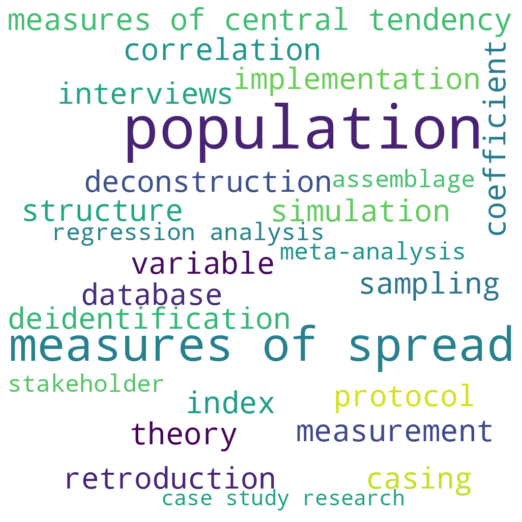

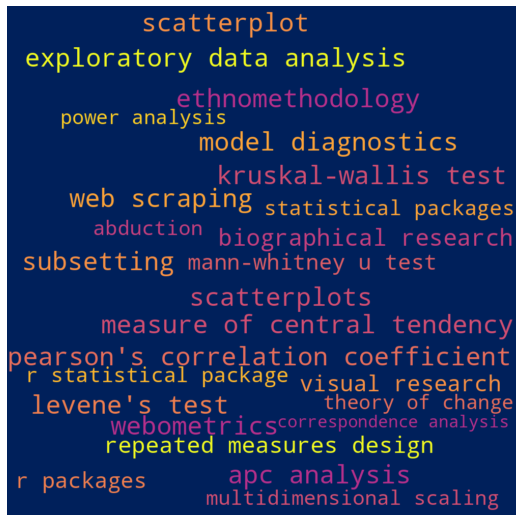

In [13]:
# CLES
corpCLES = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.college == 'College of Life and Environmental Sciences']['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloud(corpCLES, seed = 1, maxwords = 25, relative_scale_factor = 0.01)
plt.show()
# plt.savefig('../Plots/CLES_topmethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

# Keyness
keynessCLES = ct.keyness(corpCLES.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudDark(keynessCLES, seed = 1, maxwords = 25, relative_scale_factor = 0.5)
plt.show()
# plt.savefig('../Plots/CLES_keymethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

### College of Medicine and Health

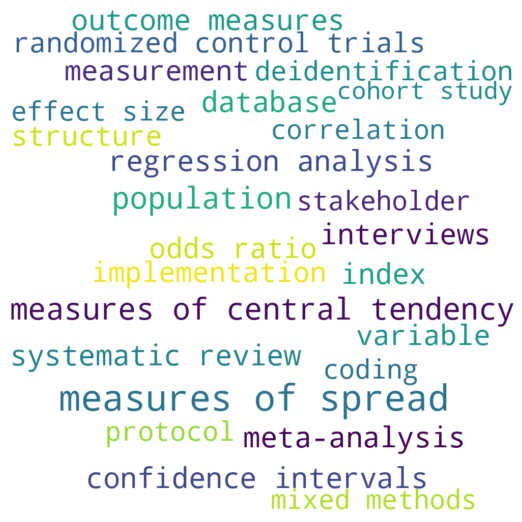

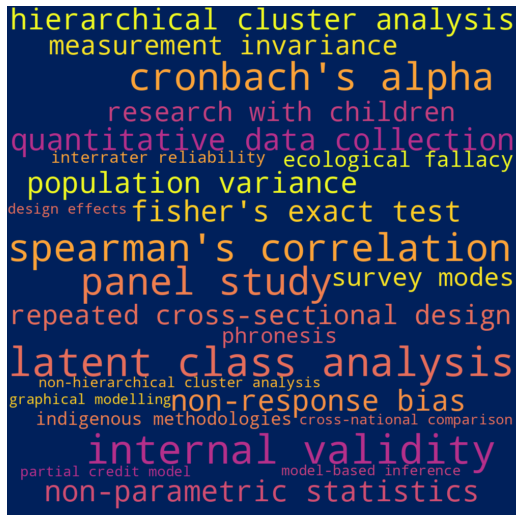

In [14]:
# Medicine
corpMedicine = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.college == 'College of Medicine and Health']['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloud(corpMedicine, seed = 1, maxwords = 25, relative_scale_factor = 0.1)
plt.show()
# plt.savefig('../Plots/Medicine_topmethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

# Keyness
keynessMedicine = ct.keyness(corpMedicine.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudDark(keynessMedicine, seed = 1, maxwords = 25, relative_scale_factor = 0.3)
plt.show()
# plt.savefig('../Plots/Medicine_keymethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

### College of Social Sciences and International Studies

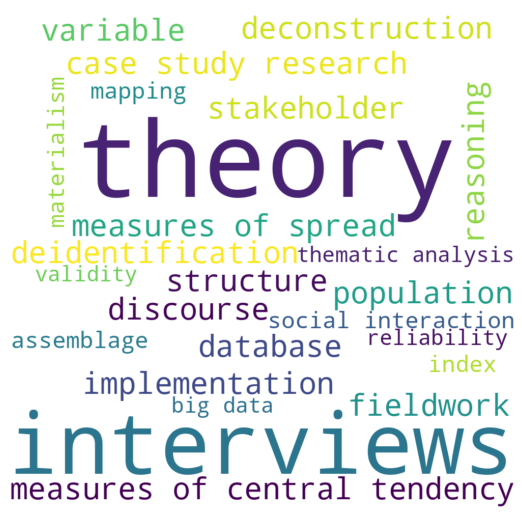

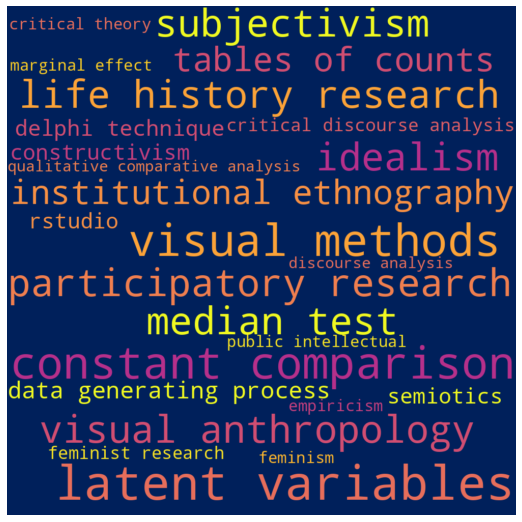

In [15]:
# SSIS
corpSSIS = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.college == 'College of Social Sciences and International Studies']['methods'] if not m == None] for item in sublist])
# Create and save wordcloud
makeWordcloud(corpSSIS, seed = 1, maxwords = 25, relative_scale_factor = 0.001)
plt.show()
# plt.savefig('../Plots/SSIS_topmethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

# Keyness
keynessSSIS = ct.keyness(corpSSIS.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudDark(keynessSSIS, seed = 1, maxwords = 25, relative_scale_factor = 0.3)
plt.show()
# plt.savefig('../Plots/SSIS_keymethods.jpg', bbox_inches='tight', dpi=300)
plt.close()

## Research methods over time - what is new?

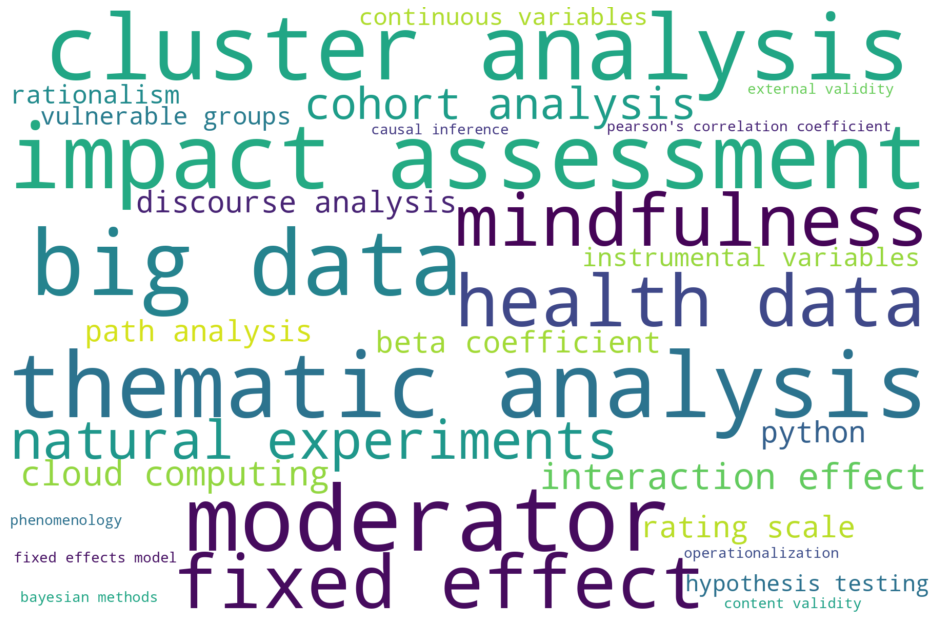

In [16]:
# Methods used in the last decade
corpLastDecade = getFrequencyDictForText([item for sublist in [list(set(m)) for m in df[df.year >= 2012]['methods'] if not m == None] for item in sublist])
# Keyness
keynessLastDecade = ct.keyness(corpLastDecade.copy(), corpMethods, effect = "odds-ratio")
makeWordcloudLarge(keynessLastDecade, seed = 1, maxwords = 30, relative_scale_factor = 0.3)
plt.show()
# plt.savefig('../Plots/keynessLastDecade_keymethods.jpg', bbox_inches='tight', dpi=400)
plt.close()